In [1]:
import sys, numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
relu = lambda x: (x > 0) * x
sigmoid = lambda x: 1 / (1 + np.exp(-x))
tanh = lambda x: np.tanh(x)

In [3]:
import json
import pickle

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# fig = plt.figure(figsize=(10, 8))
images = x_train[:1000]
# ax = fig.add_axes([1, 1, 1, 1])
# ax.imshow(image, cmap='Greys', interpolation='None')
# ax.grid()

In [6]:
size_batch = images.shape[0]

In [7]:
width, height = 3, 3
kernel_width = images.shape[2] - width
kernel_height = images.shape[1] - height
num_kernels = 16

In [8]:
# size_batch

In [8]:
# inputs_images = []
# for image in images:
#     image_parts = []
#     for i in range(image.shape[0] - height):
#         for j in range(image.shape[1] - width):
#             image_parts.append(image[i: i + height, j: j + height].reshape(1, -1) / 255)
#     inputs_images.append(image_parts)

# inputs = np.array(inputs_images)

In [10]:
# inputs = inputs.reshape(size_batch, kernel_width * kernel_height, width * height)

In [113]:
# with open('inputs.json', 'w', encoding='utf-8') as file:
#     json.dump(inputs.tolist(), file, indent=4, ensure_ascii=False)

In [12]:
# with open('inputs1000.pkl', 'wb') as file:
#     pickle.dump(inputs, file)

In [13]:
with open('inputs1000.pkl', 'rb') as file:
    inputs = pickle.load(file)

In [15]:
np.random.seed(1)
weights = 0.2 * np.random.random((width * height, num_kernels)) - 0.1

In [17]:
func = lambda x: max(x)

In [18]:
cnn = relu(inputs.dot(weights).reshape(size_batch, kernel_width * kernel_height, num_kernels))
cnn = np.array([list(map(func, x)) for x in cnn])
# cnn = cnn.reshape(size_batch, 25, 25)

In [19]:
cnn.shape

(1000, 625)

In [20]:
cnn[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

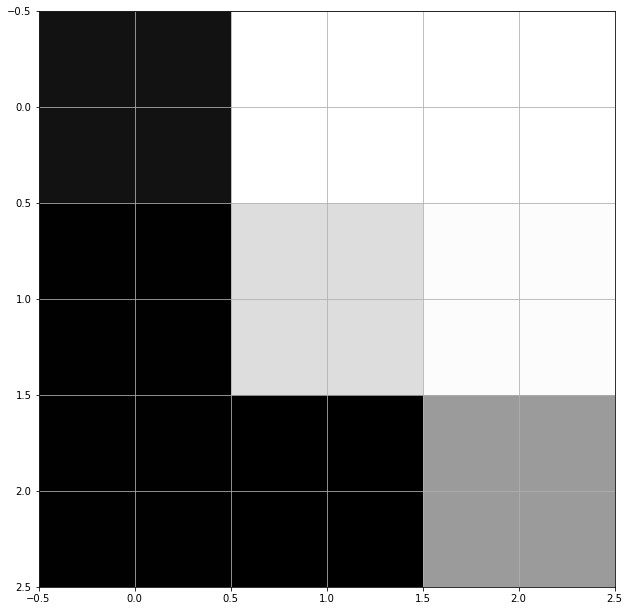

In [75]:
fig = plt.figure(figsize=(10, 8))
image = inputs[144]
ax = fig.add_axes([1, 1, 1, 1])
ax.imshow(image, cmap='Greys', interpolation='None')
ax.grid()